# Сессия1. 
---

В данной сессии нам необходимо предобработать данные, визуализировать. Подготовить обучающую и тестовую выборку, создать частотный мешок сайтов и подготовить отчет

## 1.1 Подготовка тестовой и обучающей выборки.
---

В данном задании нам необходимо подготовить данные для дальнейшего анализа и построения прогнозных моделей. После этого необходимо выполнить загрузку всех данных. Данные должны быть очищены

Для того чтобы загрузить наши данные, будем использовать следющие библиотеки

In [140]:
#import libs
import pandas as pd

Для начала посмотрим на сами данные

In [141]:
df_train = pd.read_csv("train_ses.csv")

In [142]:
df_test = pd.read_csv("test_ses.csv")

Загрузим также `pkl` файл 

In [143]:
site = pd.read_pickle("site.pkl")

Для начала посмотрим на `train_ses.csv`

In [144]:
df_train.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


Далее посмотрим на `test_ses.csv`

In [145]:
df_test.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35.0,2014-10-04 11:19:53,22.0,2014-10-04 11:19:54,321.0,2014-10-04 11:19:54,23.0,...,2211.0,2014-10-04 11:19:54,6730.0,2014-10-04 11:19:54,21.0,2014-10-04 11:19:54,44582.0,2014-10-04 11:20:00,15336.0,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782.0,2014-07-03 11:00:53,782.0,2014-07-03 11:00:58,782.0,2014-07-03 11:01:06,782.0,...,782.0,2014-07-03 11:01:10,782.0,2014-07-03 11:01:23,782.0,2014-07-03 11:01:29,782.0,2014-07-03 11:01:30,782.0,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55.0,2014-12-05 15:55:13,55.0,2014-12-05 15:55:14,55.0,2014-12-05 15:56:15,55.0,...,55.0,2014-12-05 15:56:17,55.0,2014-12-05 15:56:18,55.0,2014-12-05 15:56:19,1445.0,2014-12-05 15:56:33,1445.0,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022.0,2014-11-04 10:03:19,50.0,2014-11-04 10:03:20,222.0,2014-11-04 10:03:21,202.0,...,3374.0,2014-11-04 10:03:22,50.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:22,48.0,2014-11-04 10:03:23,3374.0,2014-11-04 10:03:23
4,5,301,2014-05-16 15:05:31,301.0,2014-05-16 15:05:32,301.0,2014-05-16 15:05:33,66.0,2014-05-16 15:05:39,67.0,...,69.0,2014-05-16 15:05:40,70.0,2014-05-16 15:05:40,68.0,2014-05-16 15:05:40,71.0,2014-05-16 15:05:40,167.0,2014-05-16 15:05:44


In [146]:
site

{'www.abmecatronique.com': 25075,
 'groups.live.com': 13997,
 'majeureliguefootball.wordpress.com': 42436,
 'cdt46.media.tourinsoft.eu': 30911,
 'www.hdwallpapers.eu': 8104,
 'img378.imageshack.us': 37491,
 'ecologie.nature.free.fr': 5462,
 'www.ibcn.intec.ugent.be': 35425,
 'kissanime.com': 30151,
 'www.carolineconduiteformation.com': 38268,
 'images.mystockphoto.com': 43641,
 'journalph.csphares.qc.ca': 36959,
 'www.uqo.ca': 40935,
 'd8d94e0wul1nb.cloudfront.net': 12346,
 'openapi.elong.com': 31023,
 'flamenco-o.blogspot.com': 31114,
 'www.pages-annuaire.net': 28165,
 'smart2000.pagesperso-orange.fr': 31877,
 'fast.forbes.com': 31070,
 'i1-js-14-3-01-10077-536503633-i.init.cedexis-radar.net': 12938,
 'i1-js-14-3-01-11074-716595896-i.init.cedexis-radar.net': 42002,
 'www.pacajob.com': 5671,
 'mathaa.epfl.ch': 32074,
 'cbv.sfr.bench.cedexis.com': 7104,
 'fbcdn-sphotos-b-a.akamaihd.net': 1939,
 'www.mystere-tv.com': 6708,
 'www.mon-ip.fr': 43589,
 'www.aqua-passion.com': 45241,
 'reunio

In [147]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   session_id  82797 non-null  int64  
 1   site1       82797 non-null  int64  
 2   time1       82797 non-null  object 
 3   site2       81308 non-null  float64
 4   time2       81308 non-null  object 
 5   site3       80075 non-null  float64
 6   time3       80075 non-null  object 
 7   site4       79182 non-null  float64
 8   time4       79182 non-null  object 
 9   site5       78341 non-null  float64
 10  time5       78341 non-null  object 
 11  site6       77566 non-null  float64
 12  time6       77566 non-null  object 
 13  site7       76840 non-null  float64
 14  time7       76840 non-null  object 
 15  site8       76151 non-null  float64
 16  time8       76151 non-null  object 
 17  site9       75484 non-null  float64
 18  time9       75484 non-null  object 
 19  site10      74806 non-nul

In [148]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       250098 non-null  float64
 4   time2       250098 non-null  object 
 5   site3       246919 non-null  float64
 6   time3       246919 non-null  object 
 7   site4       244321 non-null  float64
 8   time4       244321 non-null  object 
 9   site5       241829 non-null  float64
 10  time5       241829 non-null  object 
 11  site6       239495 non-null  float64
 12  time6       239495 non-null  object 
 13  site7       237297 non-null  float64
 14  time7       237297 non-null  object 
 15  site8       235224 non-null  float64
 16  time8       235224 non-null  object 
 17  site9       233084 non-null  float64
 18  time9       233084 non-null  object 
 19  si

In [149]:
#Очистка от NaN значений для тренировочной выборки
df_train = df_train.fillna(0)
df_train = df_train.reset_index(drop = True)
#Очистка от NaN значений для тестовой выборки
df_test = df_test.fillna(0)
df_test = df_test.reset_index(drop = True)

In [150]:
df_train.head()

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,time6,site7,time7,site8,time8,site9,time9,site10,time10,target
0,1,718,2014-02-20 10:02:45,0.0,0,0.0,0,0.0,0,0.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0
1,2,890,2014-02-22 11:19:50,941.0,2014-02-22 11:19:50,3847.0,2014-02-22 11:19:51,941.0,2014-02-22 11:19:51,942.0,...,2014-02-22 11:19:51,3847.0,2014-02-22 11:19:52,3846.0,2014-02-22 11:19:52,1516.0,2014-02-22 11:20:15,1518.0,2014-02-22 11:20:16,0
2,3,14769,2013-12-16 16:40:17,39.0,2013-12-16 16:40:18,14768.0,2013-12-16 16:40:19,14769.0,2013-12-16 16:40:19,37.0,...,2013-12-16 16:40:19,14768.0,2013-12-16 16:40:20,14768.0,2013-12-16 16:40:21,14768.0,2013-12-16 16:40:22,14768.0,2013-12-16 16:40:24,0
3,4,782,2014-03-28 10:52:12,782.0,2014-03-28 10:52:42,782.0,2014-03-28 10:53:12,782.0,2014-03-28 10:53:42,782.0,...,2014-03-28 10:54:42,782.0,2014-03-28 10:55:12,782.0,2014-03-28 10:55:42,782.0,2014-03-28 10:56:12,782.0,2014-03-28 10:56:42,0
4,5,22,2014-02-28 10:53:05,177.0,2014-02-28 10:55:22,175.0,2014-02-28 10:55:22,178.0,2014-02-28 10:55:23,177.0,...,2014-02-28 10:55:59,175.0,2014-02-28 10:55:59,177.0,2014-02-28 10:55:59,177.0,2014-02-28 10:57:06,178.0,2014-02-28 10:57:11,0


In [151]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253561 entries, 0 to 253560
Data columns (total 22 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   session_id  253561 non-null  int64  
 1   site1       253561 non-null  int64  
 2   time1       253561 non-null  object 
 3   site2       253561 non-null  float64
 4   time2       253561 non-null  object 
 5   site3       253561 non-null  float64
 6   time3       253561 non-null  object 
 7   site4       253561 non-null  float64
 8   time4       253561 non-null  object 
 9   site5       253561 non-null  float64
 10  time5       253561 non-null  object 
 11  site6       253561 non-null  float64
 12  time6       253561 non-null  object 
 13  site7       253561 non-null  float64
 14  time7       253561 non-null  object 
 15  site8       253561 non-null  float64
 16  time8       253561 non-null  object 
 17  site9       253561 non-null  float64
 18  time9       253561 non-null  object 
 19  si

Далее нам необходимо привести времнянные ряды к типу данных `datetime` и привести данные по сессиям к `int64` вместо `float64`


- Создадим 2 словаря с типами данных для каждой переменной
- После чего преобразуем тип с помощью метода `.astype()`

In [152]:
#datetime
td = {"time1": 'datetime64', 
      "time2": 'datetime64', 
      "time3": 'datetime64', 
      "time4": 'datetime64', 
      "time5": 'datetime64', 
      "time6": 'datetime64', 
      "time7": 'datetime64', 
      "time8": 'datetime64', 
      "time9": 'datetime64', 
      "time10": 'datetime64'}
#int64
sd = {"site1": 'int64', 
      "site2": 'int64', 
      "site3": 'int64', 
      "site4": 'int64', 
      "site5": 'int64', 
      "site6": 'int64', 
      "site7": 'int64', 
      "site8": 'int64', 
      "site9": 'int64', 
      "site10": 'int64'}
#do datetime astype
df_train = df_train.astype(td)
df_test = df_test.astype(td)
#do int64 astype
df_train = df_train.astype(sd)
df_test = df_test.astype(sd)

In [153]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82797 entries, 0 to 82796
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   session_id  82797 non-null  int64         
 1   site1       82797 non-null  int64         
 2   time1       82797 non-null  datetime64[ns]
 3   site2       82797 non-null  int64         
 4   time2       82797 non-null  datetime64[ns]
 5   site3       82797 non-null  int64         
 6   time3       82797 non-null  datetime64[ns]
 7   site4       82797 non-null  int64         
 8   time4       82797 non-null  datetime64[ns]
 9   site5       82797 non-null  int64         
 10  time5       82797 non-null  datetime64[ns]
 11  site6       82797 non-null  int64         
 12  time6       82797 non-null  datetime64[ns]
 13  site7       82797 non-null  int64         
 14  time7       82797 non-null  datetime64[ns]
 15  site8       82797 non-null  int64         
 16  time8       82797 non-

In [154]:
df_test

,session_id,site1,time1,site2,time2,site3,time3,site4,time4,site5,...,site6,time6,site7,time7,site8,time8,site9,time9,site10,time10
0,1,29,2014-10-04 11:19:53,35,2014-10-04 11:19:53,22,2014-10-04 11:19:54,321,2014-10-04 11:19:54,23,...,2211,2014-10-04 11:19:54,6730,2014-10-04 11:19:54,21,2014-10-04 11:19:54,44582,2014-10-04 11:20:00,15336,2014-10-04 11:20:00
1,2,782,2014-07-03 11:00:28,782,2014-07-03 11:00:53,782,2014-07-03 11:00:58,782,2014-07-03 11:01:06,782,...,782,2014-07-03 11:01:10,782,2014-07-03 11:01:23,782,2014-07-03 11:01:29,782,2014-07-03 11:01:30,782,2014-07-03 11:01:53
2,3,55,2014-12-05 15:55:12,55,2014-12-05 15:55:13,55,2014-12-05 15:55:14,55,2014-12-05 15:56:15,55,...,55,2014-12-05 15:56:17,55,2014-12-05 15:56:18,55,2014-12-05 15:56:19,1445,2014-12-05 15:56:33,1445,2014-12-05 15:56:36
3,4,1023,2014-11-04 10:03:19,1022,2014-11-04 10:03:19,50,2014-11-04 10:03:20,222,2014-11-04 10:03:21,202,...,3374,2014-11-04 10:03:22,50,2014-11-04 10:03:22,48,2014-11-04 10:03:22,48,2014-11-04 10:03:23,3374,2014-11-04 10:03:23
4,5,301,2014-05-16 15:05:31,301,2014-05-16 15:05:32,301,2014-05-16 15:05:33,66,2014-05-16 15:05:39,67,...,69,2014-05-16 15:05:40,70,2014-05-16 15:05:40,68,2014-05-16 15:05:40,71,2014-05-16 15:05:40,167,2014-05-16 15:05:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,82793,812,2014-10-02 18:20:09,1039,2014-10-02 18:20:09,676,2014-10-02 18:20:09,0,1970-01-01 00:00:00,0,...,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00
82793,82794,300,2014-05-26 14:16:40,302,2014-05-26 14:16:41,302,2014-05-26 14:16:44,300,2014-05-26 14:16:44,300,...,1222,2014-05-26 14:17:19,302,2014-05-26 14:17:19,1218,2014-05-26 14:17:19,1221,2014-05-26 14:17:19,1216,2014-05-26 14:17:19
82794,82795,29,2014-05-02 11:21:56,33,2014-05-02 11:21:56,35,2014-05-02 11:21:56,22,2014-05-02 11:22:03,37,...,6779,2014-05-02 11:22:03,30,2014-05-02 11:22:03,21,2014-05-02 11:22:04,23,2014-05-02 11:22:04,6780,2014-05-02 11:22:04
82795,82796,5828,2014-05-03 10:05:25,23,2014-05-03 10:05:27,21,2014-05-03 10:05:27,804,2014-05-03 10:05:27,21,...,3350,2014-05-03 10:05:37,23,2014-05-03 10:05:37,894,2014-05-03 10:05:38,21,2014-05-03 10:05:38,961,2014-05-03 10:05:38


Добавим наш словарь сайтов в отдельный датафрейм

In [155]:
df_sites = pd.DataFrame(data = site.values(), index = site.keys(), columns = ["site_id"])

In [156]:
df_sites

,site_id
www.abmecatronique.com,25075
groups.live.com,13997
majeureliguefootball.wordpress.com,42436
cdt46.media.tourinsoft.eu,30911
www.hdwallpapers.eu,8104
...,...
i1-js-14-3-01-11074-747051290-i.init.cedexis-radar.net,29738
i1-js-14-3-01-12434-548464295-i.init.cedexis-radar.net,40794
embed.api.tv,10939
n-tennis.fr,40028


In [157]:
#drop for train
df_train = df_train.drop(columns = "session_id", axis = 1)
#drop for test
df_test = df_test.drop(columns = "session_id", axis = 1)

Далее сохраним наши данные в `csv` формат

In [37]:
print("Идет сохранение данных")
df_train.to_csv("train_clean.csv")
df_test.to_csv("test_clean.csv")
df_sites.to_csv("sites_df.csv")
print("Данные сохранены")

Идет сохранение данных
Данные сохранены


### Итог 1.1.

1. Данные очищены от NaN значений
2. Преобразованы типы данных к нужному формату
3. Итоговые выборки сохранены

## 1.2 Работа с разреженным форматом данных
----

В данном задании нам необходимо сформировать мешок сайтов, то есть необходимо создать новые таблицы, в которых строкам будут соответствовать сессии из 10 сайтов, а столбцам индексы

In [18]:
S = ["site" + str(i) for i in range(1, 11)]
dict_train = {}
for i in range(len(df_train)):
    d = df_train.iloc[i][S].value_counts().to_json()
    dict_train[i] = d

In [19]:
S = ["site" + str(i) for i in range(1, 11)]
dict_test = {}
for i in range(len(df_test)):
    d = df_test.iloc[i][S].value_counts().to_json()
    dict_test[i] = d

In [29]:
S = ["site" + str(i) for i in range(1, 11)]
print(S)

['site1', 'site2', 'site3', 'site4', 'site5', 'site6', 'site7', 'site8', 'site9', 'site10']


In [20]:
#сохраняем тренировочную выборку
import pickle
fileName = "dicTrain.pkl"
print("Сохраняем частотный словарь для тренировочной выборки")
with open(fileName, "wb") as fileTrain:
    pickle.dump(dict_train, fileTrain)
print("Словарь сохранен!")

Сохраняем частотный словарь для тренировочной выборки
Словарь сохранен!


In [22]:
#сохраняем тренировочную выборку
import pickle
fileName = "dicTest.pkl"
print("Сохраняем частотный словарь для тестовой выборки")
with open(fileName, "wb") as fileTrain:
    pickle.dump(dict_test, fileTrain)
print("Словарь сохранен!")

Сохраняем частотный словарь для тестовой выборки
Словарь сохранен!


## Итог 1.2

- Частотный словарь сформирован

## 1.3 Визуальный анализ данных

Используя программные средства, необходимо визуализировать зависимости данных

В качестве первого метода будем использовать `countplot` чтобы посмотреть визуальное распределение нашего таргета 

In [158]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

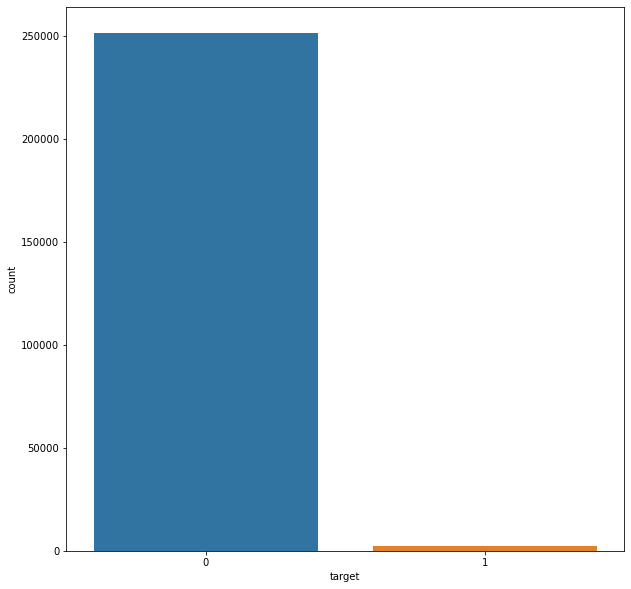

In [159]:
#countplot
plt.figure(figsize = (10, 10))
sns.countplot(df_train["target"])

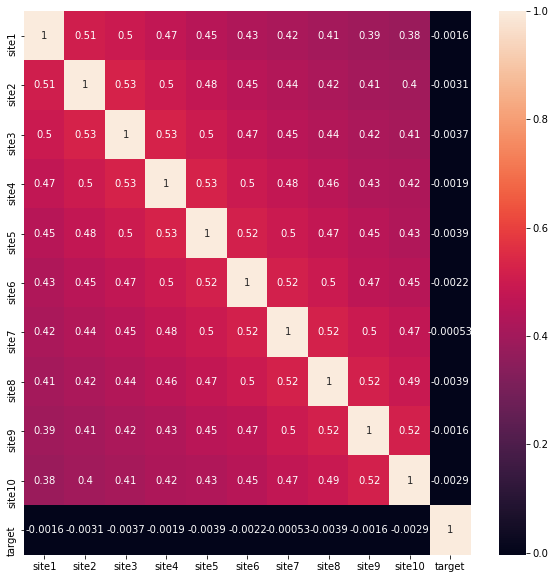

In [160]:
#heatmap
plt.figure(figsize = (10, 10))
sns.heatmap(df_train.corr(), annot = True)

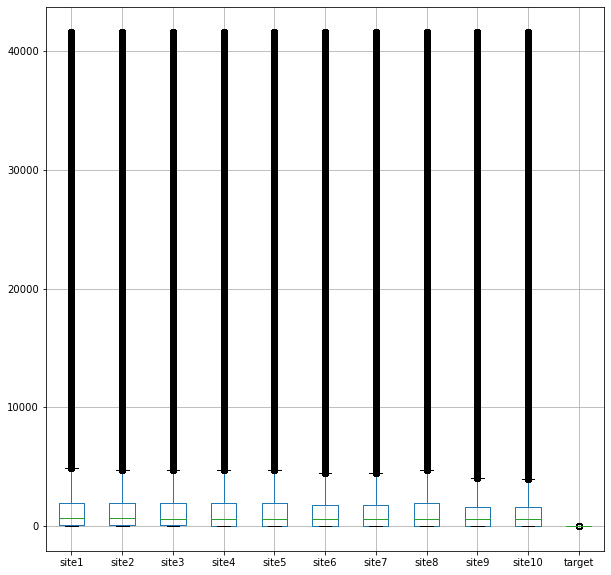

In [161]:
#boxplot
df_train.boxplot(figsize = (10, 10))

### Итог 1.3

## 1.4 Конструирование признаков(Feature Engineering)

В данном задании необходимо создать такую функцию которая будет добавлять в наши датафреймы новые признаки

In [162]:
import datetime

In [163]:
def new_features(df):
    df["ym"] = df.apply(lambda x: "".join(str(x["time1"])[:str(x["time1"]).rfind("-")].split("-")), axis=1)
    
    df["time_diff"] = df.apply(lambda x: (datetime.datetime.strptime(str(x["time10"]), '%Y-%m-%d %H:%M:%S') -
 datetime.datetime.strptime(str(x["time1"]), '%Y-%m-%d %H:%M:%S')).total_seconds(), axis=1)
    
    df["max_repeat"] = df[["site1","site2","site3","site4","site5","site6","site7","site8","site9","site10"]].apply(lambda x: x.value_counts().max(), axis=1)
    
    df = df.astype({"ym":"int64"})
    return df 

In [164]:
df_train = new_features(df_train)

In [165]:
df_test = new_features(df_test)

In [166]:
df_train.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,site8,time8,site9,time9,site10,time10,target,ym,time_diff,max_repeat
0,718,2014-02-20 10:02:45,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,...,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,1970-01-01 00:00:00,0,201402,-1.392891e+09,9
1,890,2014-02-22 11:19:50,941,2014-02-22 11:19:50,3847,2014-02-22 11:19:51,941,2014-02-22 11:19:51,942,2014-02-22 11:19:51,...,3846,2014-02-22 11:19:52,1516,2014-02-22 11:20:15,1518,2014-02-22 11:20:16,0,201402,2.600000e+01,2
2,14769,2013-12-16 16:40:17,39,2013-12-16 16:40:18,14768,2013-12-16 16:40:19,14769,2013-12-16 16:40:19,37,2013-12-16 16:40:19,...,14768,2013-12-16 16:40:21,14768,2013-12-16 16:40:22,14768,2013-12-16 16:40:24,0,201312,7.000000e+00,5
3,782,2014-03-28 10:52:12,782,2014-03-28 10:52:42,782,2014-03-28 10:53:12,782,2014-03-28 10:53:42,782,2014-03-28 10:54:12,...,782,2014-03-28 10:55:42,782,2014-03-28 10:56:12,782,2014-03-28 10:56:42,0,201403,2.700000e+02,10
4,22,2014-02-28 10:53:05,177,2014-02-28 10:55:22,175,2014-02-28 10:55:22,178,2014-02-28 10:55:23,177,2014-02-28 10:55:23,...,177,2014-02-28 10:55:59,177,2014-02-28 10:57:06,178,2014-02-28 10:57:11,0,201402,2.460000e+02,4


In [167]:
df_test.head()

,site1,time1,site2,time2,site3,time3,site4,time4,site5,time5,...,time7,site8,time8,site9,time9,site10,time10,ym,time_diff,max_repeat
0,29,2014-10-04 11:19:53,35,2014-10-04 11:19:53,22,2014-10-04 11:19:54,321,2014-10-04 11:19:54,23,2014-10-04 11:19:54,...,2014-10-04 11:19:54,21,2014-10-04 11:19:54,44582,2014-10-04 11:20:00,15336,2014-10-04 11:20:00,201410,7.0,1
1,782,2014-07-03 11:00:28,782,2014-07-03 11:00:53,782,2014-07-03 11:00:58,782,2014-07-03 11:01:06,782,2014-07-03 11:01:09,...,2014-07-03 11:01:23,782,2014-07-03 11:01:29,782,2014-07-03 11:01:30,782,2014-07-03 11:01:53,201407,85.0,10
2,55,2014-12-05 15:55:12,55,2014-12-05 15:55:13,55,2014-12-05 15:55:14,55,2014-12-05 15:56:15,55,2014-12-05 15:56:16,...,2014-12-05 15:56:18,55,2014-12-05 15:56:19,1445,2014-12-05 15:56:33,1445,2014-12-05 15:56:36,201412,84.0,8
3,1023,2014-11-04 10:03:19,1022,2014-11-04 10:03:19,50,2014-11-04 10:03:20,222,2014-11-04 10:03:21,202,2014-11-04 10:03:21,...,2014-11-04 10:03:22,48,2014-11-04 10:03:22,48,2014-11-04 10:03:23,3374,2014-11-04 10:03:23,201411,4.0,2
4,301,2014-05-16 15:05:31,301,2014-05-16 15:05:32,301,2014-05-16 15:05:33,66,2014-05-16 15:05:39,67,2014-05-16 15:05:40,...,2014-05-16 15:05:40,68,2014-05-16 15:05:40,71,2014-05-16 15:05:40,167,2014-05-16 15:05:44,201405,13.0,3


## Итог 1.4

- добавлены новые признаки, а именно:
- разделение месяца и года
- добавлен признак сколько человек времени на сайте
- признак максимального повторения

# Заключение

1. Тестовая и обучающая выборки подготовленны и сохранены в `csv` формате. Отражено в отчете
2. Словари сайтов сформированны
3. Данные провизуализированны
4. Новые признаки сконструированны
5. Отчет подготовлен

# Сессия2. Построение модели машинного обучения

В данном модуле необходимо продолжить работать с данными, подготовленными в предыдущем модуле. На основе предобработанных данных необходимо построить и обучить модель классификации, а также добиться наиболее точной работы построенной модели.

## 2.1 Сравнение нескольких алгоритмов на сессиях

In [168]:
X = df_train.drop(columns = ["time" +  str(i) for i in range(1, 11)], axis = 1)
X = X.drop(columns = ["target"], axis = 1)
y = df_train["target"].values

### Разделение выборки на обучающую и отложенную

- Поскольку данных предостаточно, мы можем использовать стандартное разделение 70% на 30%

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle = True)

In [170]:
print(X_train.shape)
print(y_train.shape)

(190170, 13)
(190170,)


### Выбор модели

- Алгоритм случайного леса - Подойдет отлично поскольку данных и признаков достаточно.
- Алгоритм ближайших соседей - как проверочная модель
- Алгоритм градиентного бустинга - как потенциально лучшая модель, на перемешанной выборке

Импортируем нужные классы

In [171]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [172]:
rfc = RandomForestClassifier()
grb = GradientBoostingClassifier()
kn = KNeighborsClassifier()

### Алгоритм случайного леса

In [173]:
estimators = [100, 200, 500]
train_score = []
val_score = []
for estim in estimators:
    rfc = RandomForestClassifier(n_estimators=estim, n_jobs=-1, verbose = 3)
    rfc.fit(X_train, y_train)
    train_score.append(rfc.score(X_train, y_train))
    val_score.append(rfc.score(X_val, y_val))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100building tree 3 of 100
building tree 4 of 100

building tree 5 of 100building tree 6 of 100

building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s


building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200building tree 3 of 200
building tree 4 of 200

building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200

building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200building tree 15 of 200

building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s



building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66 of 200
building tree 6

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.9s


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   27.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 500building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500

building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500

[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s



building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 6

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   17.0s


building tree 121 of 500
building tree 122 of 500
building tree 123 of 500
building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500
building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500building tree 154 of 500

building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500
building tree 159 of 500
building tree 160 of 500


[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   38.8s


building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500
building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500building tree 294 of 500

building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500building tree 300 of 500

building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500
building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.1s finished


In [174]:
train_score

[0.9999789661881474, 0.9999894830940738, 0.9999894830940738]

In [175]:
val_score

[0.992080894764241, 0.992080894764241, 0.9921124449843037]

In [176]:
print(classification_report(y_val, rfc.predict(X_val)))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.7s


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     62817
           1       0.86      0.16      0.26       574

    accuracy                           0.99     63391
   macro avg       0.92      0.58      0.63     63391
weighted avg       0.99      0.99      0.99     63391



[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.3s finished


Предсказываем на тестовой  и убираем все колонки time из тестового набора

In [177]:
df_test = df_test.drop(columns = ["time" +  str(i) for i in range(1, 11)], axis = 1)

In [178]:
#предсказание на тестовых данных
rfc_preds_test= rfc.predict(df_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.7s finished


Смотрим ответы

In [179]:
print(rfc_preds)

[0 0 0 ... 0 0 0]


In [189]:
import numpy as np
to_preds = np.array([[5397, 5395, 22, 5396, 5402, 5392, 22, 35, 33, 338, 201311, 5.0, 2]])
rfc_preds_point = rfc.predict(to_preds)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 272 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.0s finished


In [190]:
rfc_preds_point

array([1], dtype=int64)

## Алгоритм ближайших соседей

In [ ]:
#обучить модель
#настроить гиперпараметры
#вывести метрики
#сделать предикт

## Алгоритм градиентного бустинга

In [ ]:
#обучить модель
#настроить гиперпараметры
#вывести метрики
#сделать предикт

## Сохраняем предикты

In [186]:
preds_df = pd.DataFrame(data = rfc_preds_test, columns = ["predicted"])

In [187]:
df_test = pd.concat([df_test, preds_df], axis = 1)

In [188]:
df_test

,site1,site2,site3,site4,site5,site6,site7,site8,site9,site10,ym,time_diff,max_repeat,predicted
0,29,35,22,321,23,2211,6730,21,44582,15336,201410,7.000000e+00,1,0
1,782,782,782,782,782,782,782,782,782,782,201407,8.500000e+01,10,0
2,55,55,55,55,55,55,55,55,1445,1445,201412,8.400000e+01,8,0
3,1023,1022,50,222,202,3374,50,48,48,3374,201411,4.000000e+00,2,0
4,301,301,301,66,67,69,70,68,71,167,201405,1.300000e+01,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82792,812,1039,676,0,0,0,0,0,0,0,201410,-1.412274e+09,7,0
82793,300,302,302,300,300,1222,302,1218,1221,1216,201405,3.900000e+01,3,0
82794,29,33,35,22,37,6779,30,21,23,6780,201405,8.000000e+00,1,0
82795,5828,23,21,804,21,3350,23,894,21,961,201405,1.300000e+01,3,0


In [129]:
df_test.to_csv("test_csv_with_preds.csv")

# Заключение